<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2: Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Jacqueline Guzmán Rodriguez (1.012'336.229)  <br>
Fecha: 15/01/2024

<left><h2>File 1: Regression algorithms</header1></left>

In [1]:
# Load libraries
from scipy.io import arff
import urllib.request
import io
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Upload file format ARFF, from to OpenML ID: 215 - Breiman et al. (1984,p.238) (2dplanes)
url = "https://www.openml.org/data/download/3652/dataset_2201_2dplanes.arff"
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))
df = pd.DataFrame(data)
print(df.shape)
df.info()

(40768, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40768 entries, 0 to 40767
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40768 non-null  float64
 1   x2      40768 non-null  float64
 2   x3      40768 non-null  float64
 3   x4      40768 non-null  float64
 4   x5      40768 non-null  float64
 5   x6      40768 non-null  float64
 6   x7      40768 non-null  float64
 7   x8      40768 non-null  float64
 8   x9      40768 non-null  float64
 9   x10     40768 non-null  float64
 10  'y'     40768 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [3]:
columns = df.columns
target = "'y'"
x_columns = columns.drop(target)
print(columns)
print(target)
print(x_columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', ''y''], dtype='object')
'y'
Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40768 entries, 0 to 40767
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40768 non-null  float64
 1   x2      40768 non-null  float64
 2   x3      40768 non-null  float64
 3   x4      40768 non-null  float64
 4   x5      40768 non-null  float64
 5   x6      40768 non-null  float64
 6   x7      40768 non-null  float64
 7   x8      40768 non-null  float64
 8   x9      40768 non-null  float64
 9   x10     40768 non-null  float64
 10  'y'     40768 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [5]:
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
x1,40768.0,0.008095,0.999980,-1.0000,-1.000000,1.000000,1.000000,1.0000
x2,40768.0,-0.005617,0.814537,-1.0000,-1.000000,0.000000,1.000000,1.0000
x3,40768.0,0.000760,0.818372,-1.0000,-1.000000,0.000000,1.000000,1.0000
x4,40768.0,0.005298,0.815668,-1.0000,-1.000000,0.000000,1.000000,1.0000
x5,40768.0,0.002943,0.817602,-1.0000,-1.000000,0.000000,1.000000,1.0000
x6,40768.0,0.000221,0.817502,-1.0000,-1.000000,0.000000,1.000000,1.0000
x7,40768.0,0.001668,0.815383,-1.0000,-1.000000,0.000000,1.000000,1.0000
x8,40768.0,-0.001472,0.816736,-1.0000,-1.000000,0.000000,1.000000,1.0000
x9,40768.0,0.002428,0.816748,-1.0000,-1.000000,0.000000,1.000000,1.0000
x10,40768.0,0.005740,0.816897,-1.0000,-1.000000,0.000000,1.000000,1.0000


In [6]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,'y'
0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,0.0,-1.0,1.0,7.73906
1,-1.0,0.0,-1.0,-1.0,1.0,1.0,1.0,0.0,-1.0,0.0,3.95676
2,1.0,0.0,1.0,1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,4.71592
3,1.0,0.0,0.0,1.0,0.0,-1.0,1.0,1.0,1.0,-1.0,5.02863
4,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-11.57480


In [7]:
#Verificar duplicados
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
40763    False
40764    False
40765    False
40766    False
40767    False
Length: 40768, dtype: bool

In [8]:
#Verificar Nulos
df.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
'y'    0
dtype: int64

In [9]:
#Borrar NULL, no es necesario porque no hay
#df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40768 entries, 0 to 40767
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40768 non-null  float64
 1   x2      40768 non-null  float64
 2   x3      40768 non-null  float64
 3   x4      40768 non-null  float64
 4   x5      40768 non-null  float64
 5   x6      40768 non-null  float64
 6   x7      40768 non-null  float64
 7   x8      40768 non-null  float64
 8   x9      40768 non-null  float64
 9   x10     40768 non-null  float64
 10  'y'     40768 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


<Axes: xlabel="'y'", ylabel='Count'>

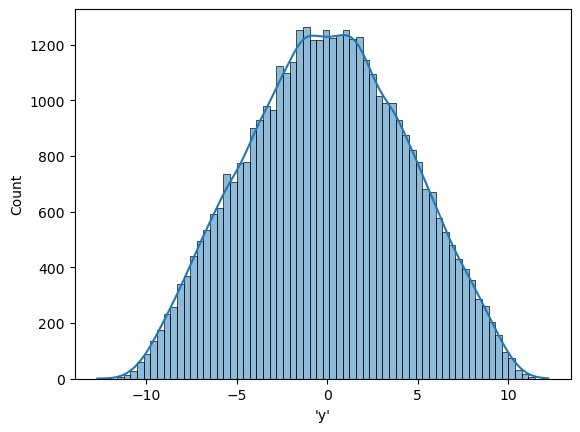

In [11]:
#Comportamiento de la variable objetivo
sns.histplot(data=df, x=target, kde=True)

In [12]:
#Dividir variables de entrada y objetivo
ValX = df.drop(columns = target)
ValY = df[target]

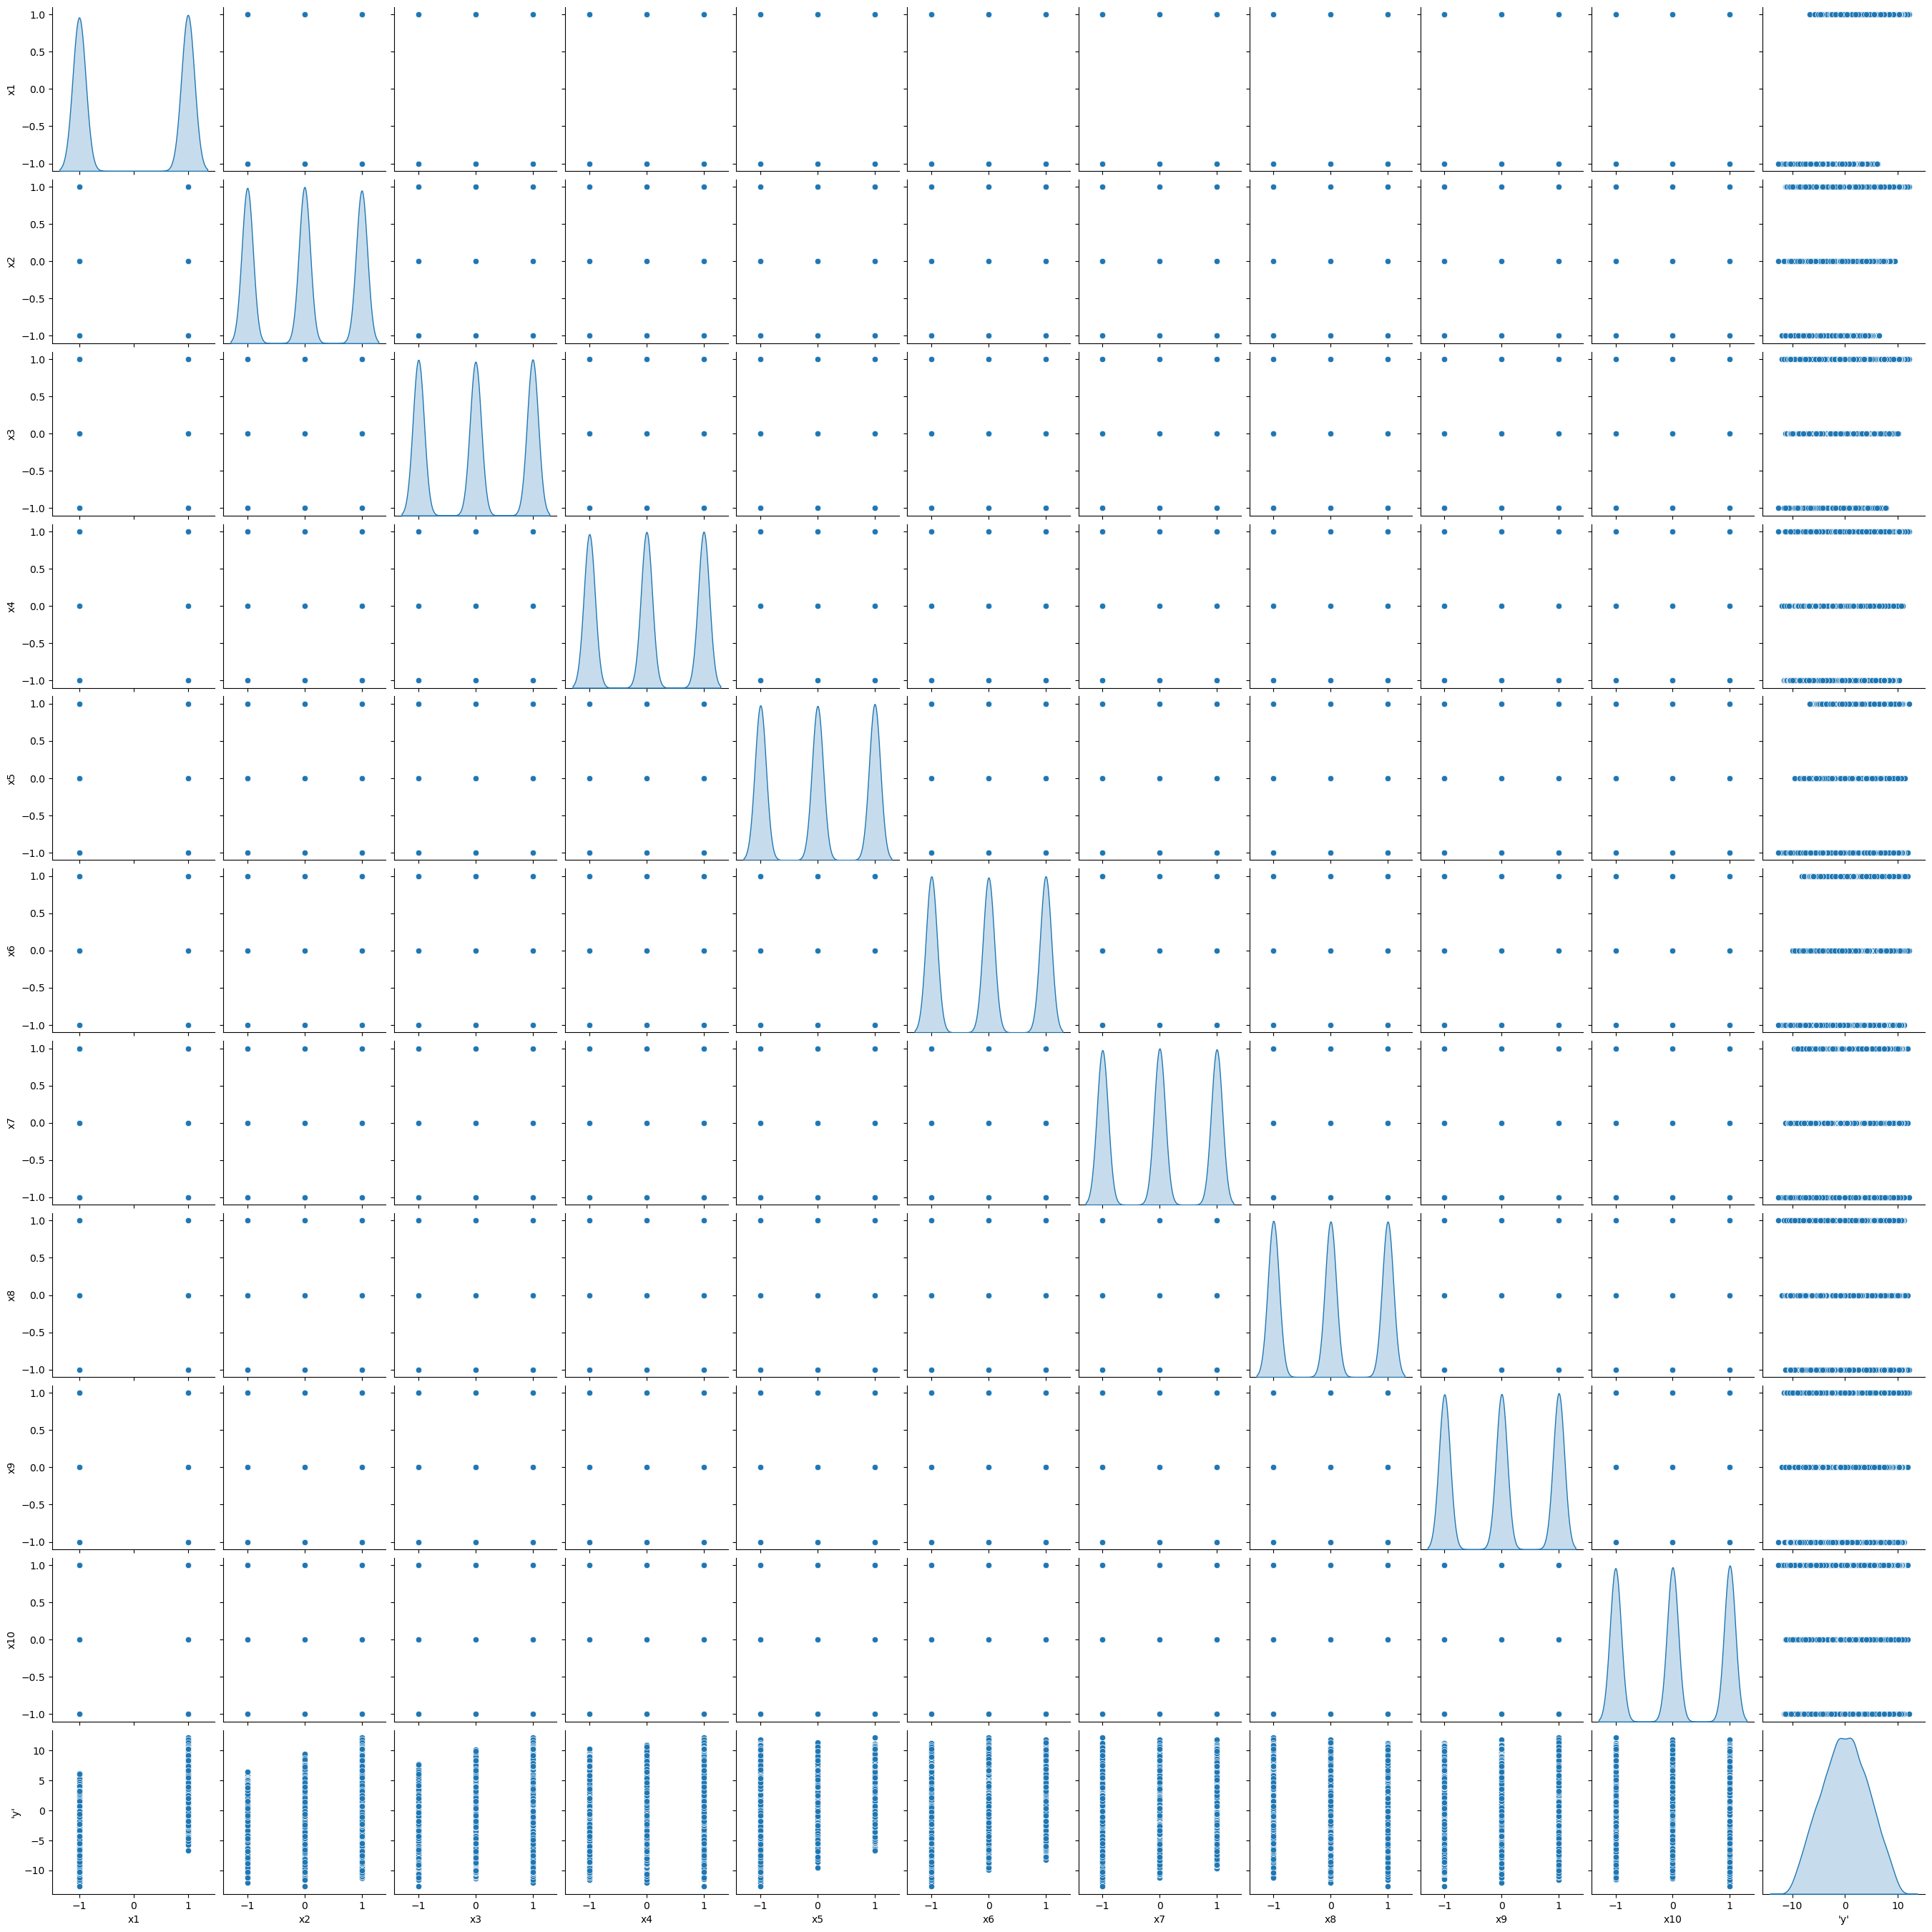

In [13]:
#Comportamiento de las variables de entrada
sns.pairplot(df, diag_kind="kde")

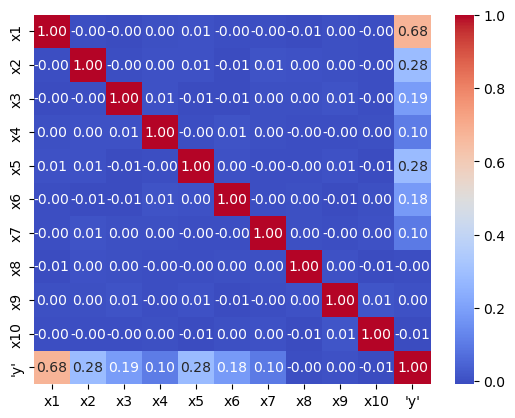

In [14]:
# Matriz de Correlación de variables
corr = df.corr(method="pearson")
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [15]:
#Dividir los datos para entrenamiento y validación de los algoritmos
X_train, X_validation, Y_train, Y_validation = train_test_split(ValX, ValY, test_size=0.15, random_state=1, shuffle=True)

<left><h2>Modelo de Regresión NO basado en Redes Neuronales</header1></left>

In [16]:
#Dado que son varios datos de entrada y uno de salida, y la correlación NO es lineal, se decide realizar un Arbol de Regresión, con los parametros estandar
model_tree_regre = DecisionTreeRegressor()
model_tree_regre.fit(X_train, Y_train)

DecisionTreeRegressor()

In [17]:
#Predicción del modelo del albol de regresión
Y_predict= model_tree_regre.predict(X_validation)
print("Prediction for test set: {}".format(Y_predict))

Prediction for test set: [ 6.15229   6.0634   -4.17626  ...  7.53967   0.755992 -1.1091  ]


In [18]:
#Crear un dataset para comprar la salida esperada con la salida de predicción
mlr_diff = pd.DataFrame({'Actual value': Y_validation, 'Predicted value': Y_predict})
mlr_diff.head()

,Actual value,Predicted value
23493,5.98919,6.152290
9299,5.32005,6.063400
2863,-4.28593,-4.176260
29118,1.47502,1.808475
12295,-1.75359,0.152517


<Axes: xlabel='Actual value', ylabel='Count'>

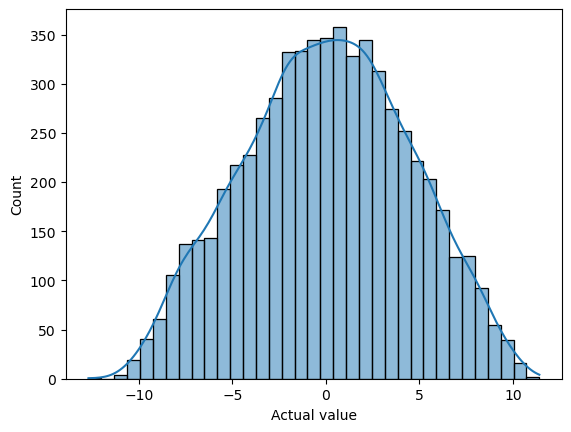

In [19]:
#Comportamiento de la salida esperada
sns.histplot(data=mlr_diff["Actual value"], kde=True)

<Axes: xlabel='Predicted value', ylabel='Count'>

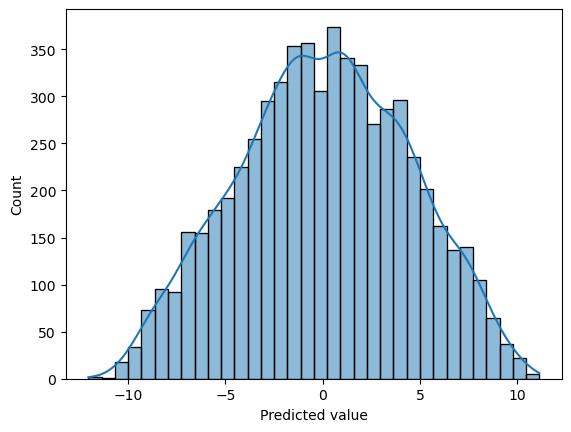

In [20]:
#Comportamientos de la Salida Predicha
sns.histplot(data=mlr_diff["Predicted value"], kde=True)

<Axes: ylabel='Count'>

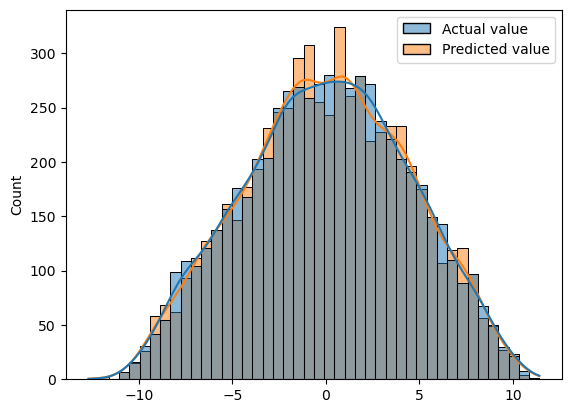

In [21]:
#Comportamiento de la salida esperada y predicha 
sns.histplot(data=mlr_diff, kde=True)

In [22]:
#Metricas de evaluación del modelo
score = model_tree_regre.score(X_train, Y_train)
mse = mean_squared_error(Y_validation, Y_predict)
print("R-squared:", score)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

R-squared: 0.982760677305698
MSE:  1.857421676383658
RMSE:  1.3628725825929795


<left><h2>Modelo de Regresión basado en Redes Neuronales</header1></left>

In [23]:
#Creación de la Red Neuronal, tiene una capa de entrada, una de salida y 4 capas intermedias, 
#se uso como función de activación la sigmoid, porque en el dataset existen valores negativos y el compartamiento de dicha función permite el aprendizaje con el uso de estos valores
#En la capa de salida se uso la función de activación linear recomendada para los modelos de regresión.
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(40, input_shape=[len(X_train.keys())]),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
)
history=insurance_model.fit(X_train,Y_train,epochs=200)
#Se guardan los valores de la metrica mae () para graficar el comportamiento del mismo


Epoch 1/200


1083/1083 [==============================] - 2s 1ms/step - loss: 3.6031 - mae: 3.6031
Epoch 2/200
1083/1083 [==============================] - 2s 1ms/step - loss: 3.6019 - mae: 3.6019
Epoch 3/200
1083/1083 [==============================] - 1s 1ms/step - loss: 3.6009 - mae: 3.6009
Epoch 4/200
1083/1083 [==============================] - 1s 1ms/step - loss: 3.5995 - mae: 3.5995
Epoch 5/200
1083/1083 [==============================] - 2s 1ms/step - loss: 3.5974 - mae: 3.5974
Epoch 6/200
1083/1083 [==============================] - 2s 1ms/step - loss: 3.5935 - mae: 3.5935
Epoch 7/200
1083/1083 [==============================] - 1s 1ms/step - loss: 3.5855 - mae: 3.5855
Epoch 8/200
1083/1083 [==============================] - 1s 1ms/step - loss: 3.5625 - mae: 3.5625
Epoch 9/200
1083/1083 [==============================] - 1s 1ms/step - loss: 3.4464 - mae: 3.4464
Epoch 10/200
1083/1083 [==============================] - 1s 1ms/step - loss: 2.8704 - mae: 2.8704
Epoch 11/200
108

Text(0.5, 0, 'Epochs')

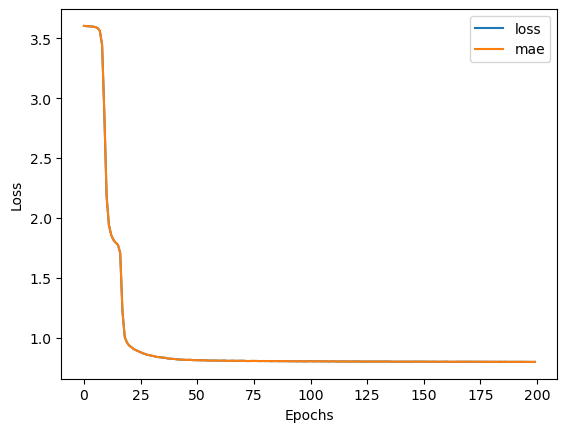

In [24]:
#Graficar la curva de entrenamiento, se ve una tendencia de como el Error Absoluto Medio baja aunque llega a niveles menores de uno, sigue siendo alto para un buen aprendizaje
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [25]:
#Evaluación del modelo con los datos de entrenamiento
loss, mae = insurance_model.evaluate(X_train, Y_train, verbose=2)

1083/1083 - 1s - loss: 0.8010 - mae: 0.8010 - 1s/epoch - 1ms/step


In [26]:
#Predicción del modelo
Y_predict = insurance_model.predict(X_validation).flatten()
print(Y_predict)

192/192 [==============================] - 0s 942us/step
[ 5.962855    7.252311   -4.139129   ...  8.109749    0.177526
 -0.85757875]


In [27]:
#Crear un dataset para comprar la salida esperada con la salida de predicción
mlr_diff = pd.DataFrame({'Actual value': Y_validation, 'Predicted value': Y_predict})
mlr_diff.head()

,Actual value,Predicted value
23493,5.98919,5.962855
9299,5.32005,7.252311
2863,-4.28593,-4.139129
29118,1.47502,1.444750
12295,-1.75359,0.067881


<Axes: xlabel='Actual value', ylabel='Count'>

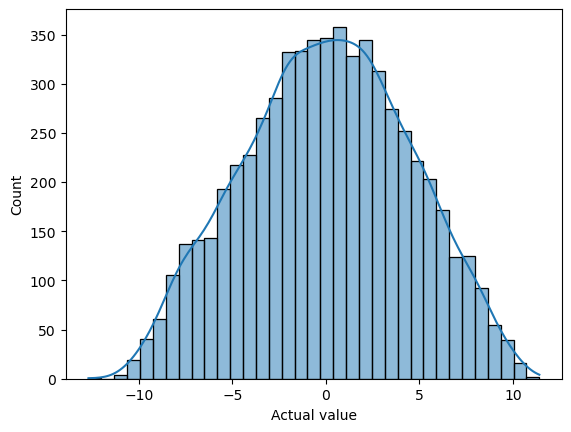

In [28]:
#Comportamiento de la salida esperada
sns.histplot(data=mlr_diff["Actual value"], kde=True)

<Axes: xlabel='Predicted value', ylabel='Count'>

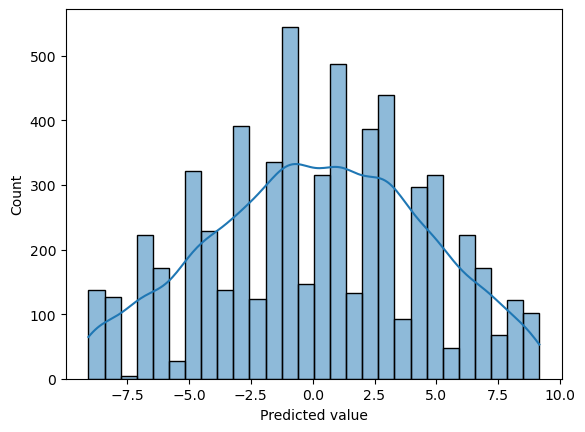

In [29]:
#Comportamiento de la salida predicha 
sns.histplot(data=mlr_diff["Predicted value"], kde=True)

<Axes: ylabel='Count'>

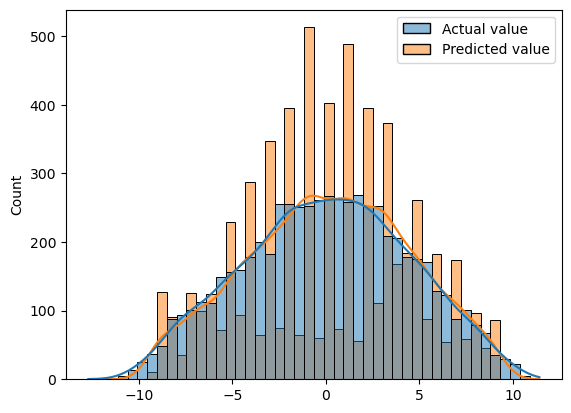

In [30]:
#Comportamiento de la salida esperada y predicha 
sns.histplot(data=mlr_diff, kde=True)